# Neural Networks - Forest Fires

### Problem Statement:
Predict the burned area of forest fires with neutral networks.

### Step-1 : Import libraries

In [282]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import warnings as warnings
warnings.filterwarnings("ignore")
from scipy import stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, StratifiedKFold, cross_val_score, RandomizedSearchCV
from sklearn.metrics import f1_score, precision_score, recall_score, classification_report,confusion_matrix,accuracy_score, roc_auc_score, roc_curve, precision_recall_curve
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.feature_selection import mutual_info_regression
from sklearn.preprocessing import StandardScaler, LabelEncoder

from keras.optimizers import Adam
from kerastuner.tuners import RandomSearch
from tensorflow.keras import layers
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils import np_utils
from keras.constraints import maxnorm
from keras.wrappers.scikit_learn import KerasRegressor, KerasClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_regression

### Step-2 : Descriptive analysis

### Step-2.1 : Working with Dataset

#### Loading the Dataset

In [283]:
# Importing the dataset
ff_data = pd.read_csv("forestfires.csv")

#### Exploring the dataset

In [284]:
# Displaying first ten records
ff_data.head(10)

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small
5,aug,sun,92.3,85.3,488.0,14.7,22.2,29,5.4,0.0,...,0,0,0,0,0,0,0,0,0,small
6,aug,mon,92.3,88.9,495.6,8.5,24.1,27,3.1,0.0,...,0,0,0,0,0,0,0,0,0,small
7,aug,mon,91.5,145.4,608.2,10.7,8.0,86,2.2,0.0,...,0,0,0,0,0,0,0,0,0,small
8,sep,tue,91.0,129.5,692.6,7.0,13.1,63,5.4,0.0,...,0,0,0,0,0,0,0,0,1,small
9,sep,sat,92.5,88.0,698.6,7.1,22.8,40,4.0,0.0,...,0,0,0,0,0,0,0,0,1,small


In [285]:
# Shape of the data
ff_data.shape

(517, 31)

In [286]:
# Summary of the data
ff_data.describe()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,...,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292,0.164410,...,0.017408,0.038685,0.003868,0.061896,0.032882,0.104449,0.003868,0.001934,0.029014,0.332689
std,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818,0.371006,...,0.130913,0.193029,0.062137,0.241199,0.178500,0.306138,0.062137,0.043980,0.168007,0.471632
min,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [287]:
# Check the data types
ff_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

#### Modifying the dataset

In [288]:
ff_data = ff_data.drop(ff_data.columns[11:30],axis=1)
ff_data

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,small
...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,small


### Step-2.2 : Handling missing values

In [289]:
# Check for Null values
ff_data.isnull().sum()

month            0
day              0
FFMC             0
DMC              0
DC               0
ISI              0
temp             0
RH               0
wind             0
rain             0
area             0
size_category    0
dtype: int64

In [290]:
# Check for duplicate values
ff_data[ff_data.duplicated()].shape

(8, 12)

In [291]:
ff_data[ff_data.duplicated()]

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category
53,aug,wed,92.1,111.2,654.1,9.6,20.4,42,4.9,0.0,0.00,small
100,aug,sun,91.4,142.4,601.4,10.6,19.8,39,5.4,0.0,0.00,small
215,mar,sat,91.7,35.8,80.8,7.8,17.0,27,4.9,0.0,28.66,large
303,jun,fri,91.1,94.1,232.1,7.1,19.2,38,4.5,0.0,0.00,small
426,aug,thu,91.6,248.4,753.8,6.3,20.4,56,2.2,0.0,0.00,small
461,aug,sat,93.7,231.1,715.1,8.4,18.9,64,4.9,0.0,0.00,small
501,aug,tue,96.1,181.1,671.2,14.3,21.6,65,4.9,0.8,0.00,small
508,aug,fri,91.0,166.9,752.6,7.1,25.9,41,3.6,0.0,0.00,small


In [292]:
ff_data=ff_data.drop_duplicates()
ff_data.shape

(509, 12)

In [293]:
ff_data.reset_index(inplace=True,drop=True)
ff_data

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,small
...,...,...,...,...,...,...,...,...,...,...,...,...
504,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,large
505,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,large
506,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,large
507,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,small


### Step-2.3 : Exploring data using Visualisation

#### Differentiate Categorical and Numerical features

In [294]:
ff_data_cat = ff_data.select_dtypes(include=['object','category'])
ff_data_cat

,month,day,size_category
0,mar,fri,small
1,oct,tue,small
2,oct,sat,small
3,mar,fri,small
4,mar,sun,small
...,...,...,...
504,aug,sun,large
505,aug,sun,large
506,aug,sun,large
507,aug,sat,small


In [295]:
ff_data_num = ff_data.select_dtypes(include=['int64','float64'])
ff_data_num

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00
...,...,...,...,...,...,...,...,...,...
504,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44
505,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29
506,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16
507,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00


#### Differentiate Discrete and Continuous features
+ Numerical variables are usually of 2 types 
+ Discrete features and continuous features

In [296]:
discrete_feature=[feature for feature in ff_data_num.columns if len(ff_data[feature].unique())<1]
discrete_feature

[]

In [297]:
continuous_feature=[feature for feature in ff_data_num.columns if feature not in discrete_feature]
continuous_feature

['FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain', 'area']

In [298]:
ff_data_cont = ff_data_num[continuous_feature]
ff_data_cont

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00
...,...,...,...,...,...,...,...,...,...
504,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44
505,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29
506,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16
507,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00


#### Univariate Analysis

#### Histogram

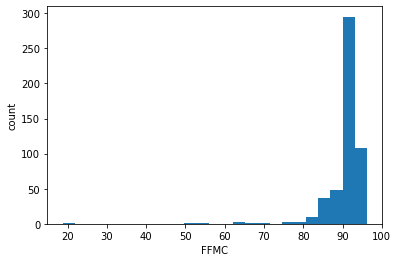

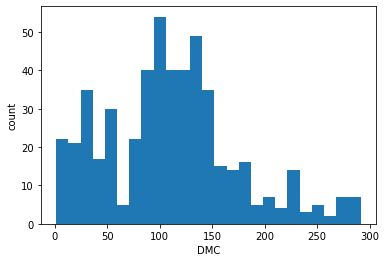

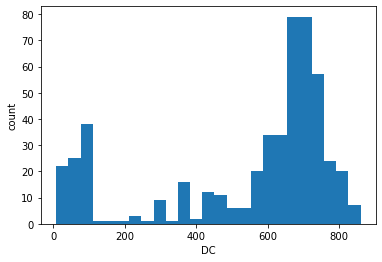

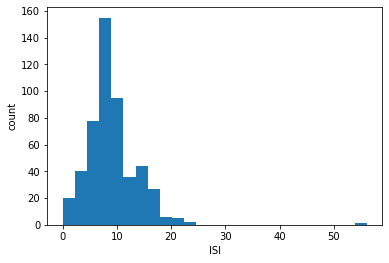

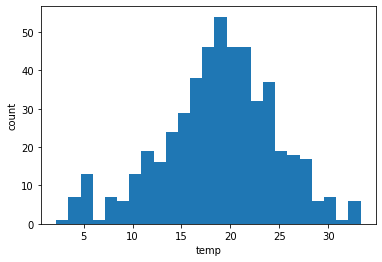

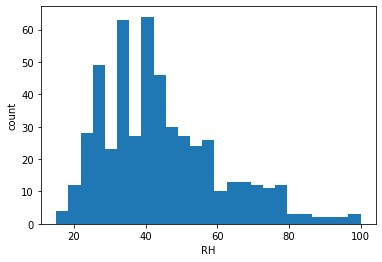

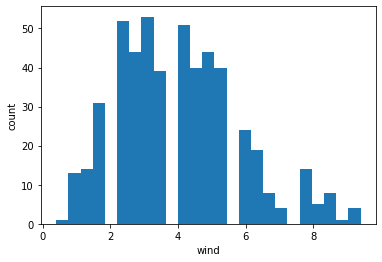

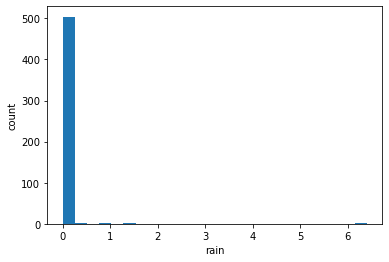

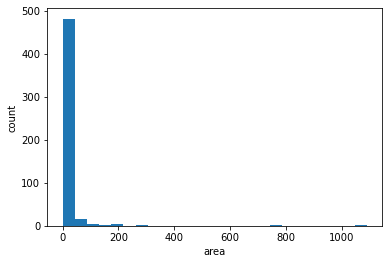

In [299]:
for feature in ff_data_cont.columns:
    plt.figure()
    plt.hist(ff_data_cont[feature],bins=25)
    plt.xlabel(feature)
    plt.ylabel("count")

#### Boxplot

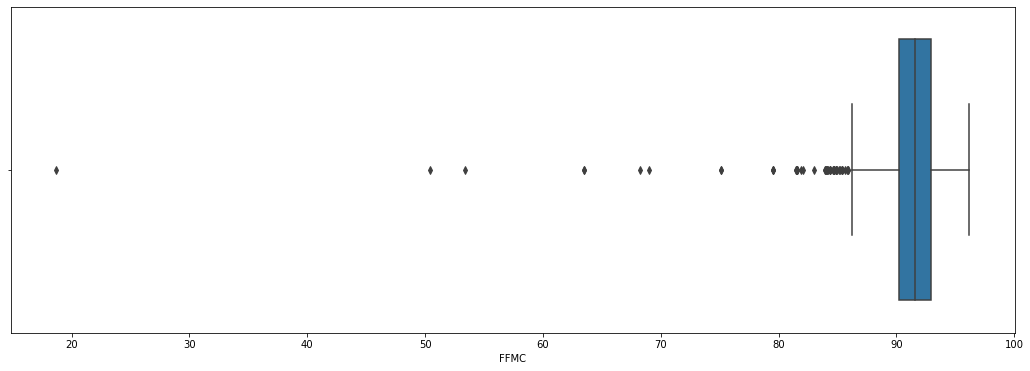

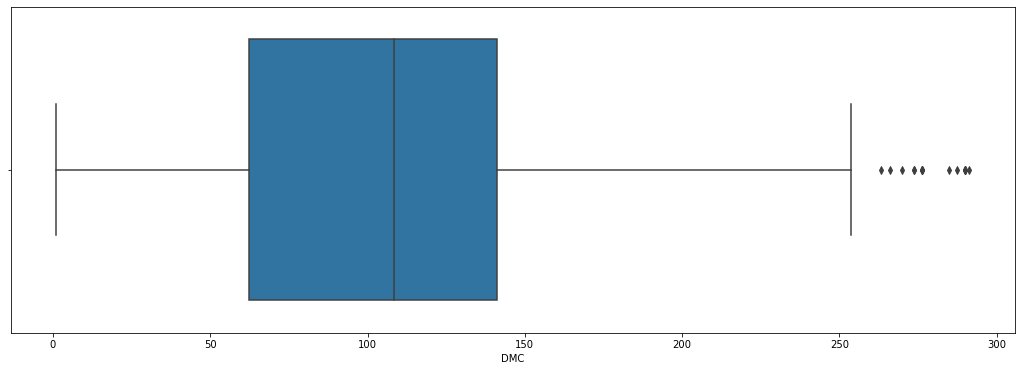

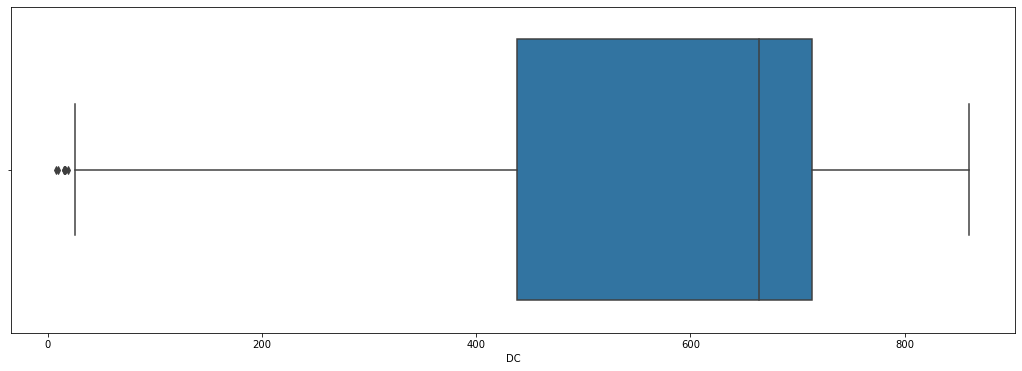

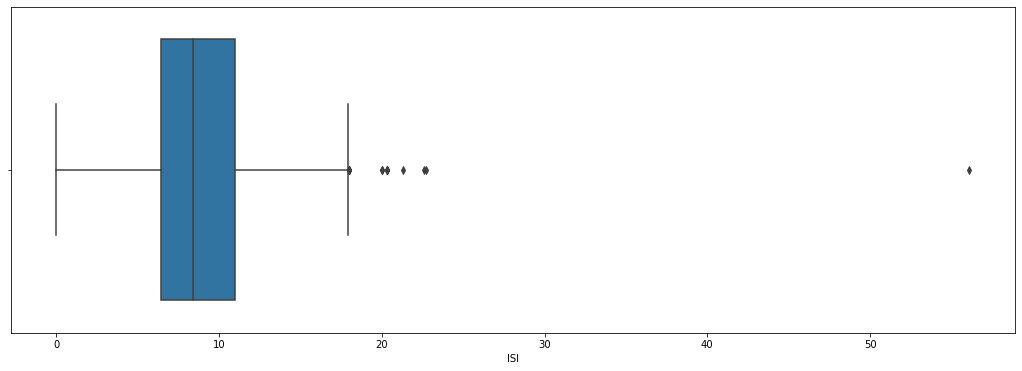

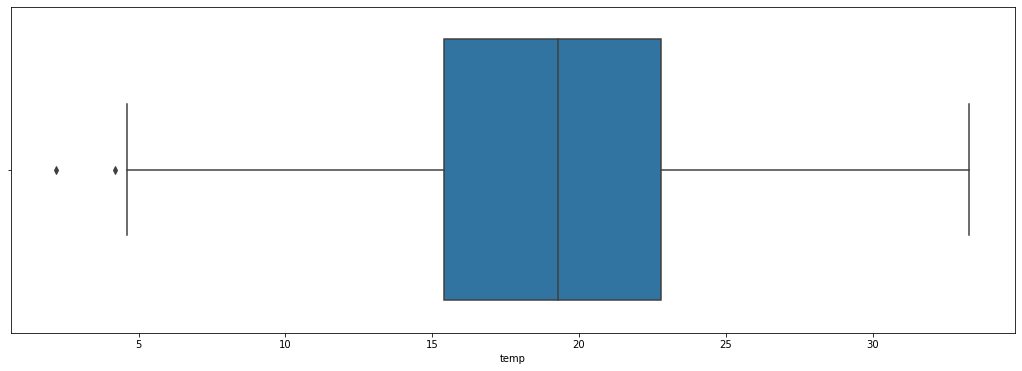

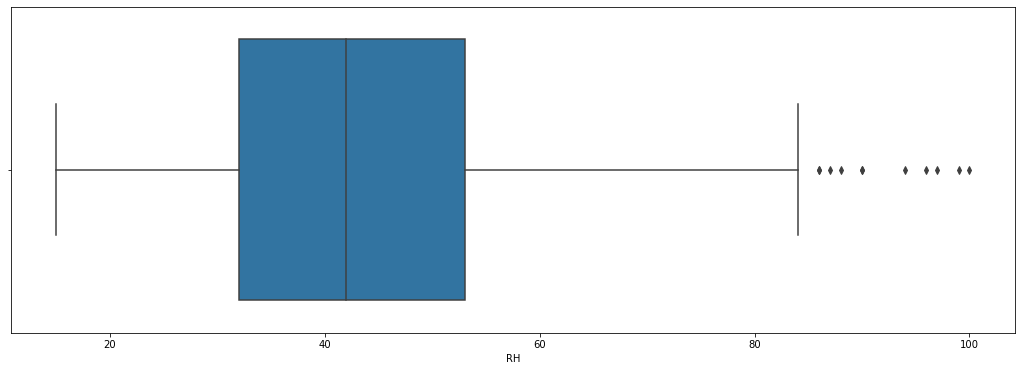

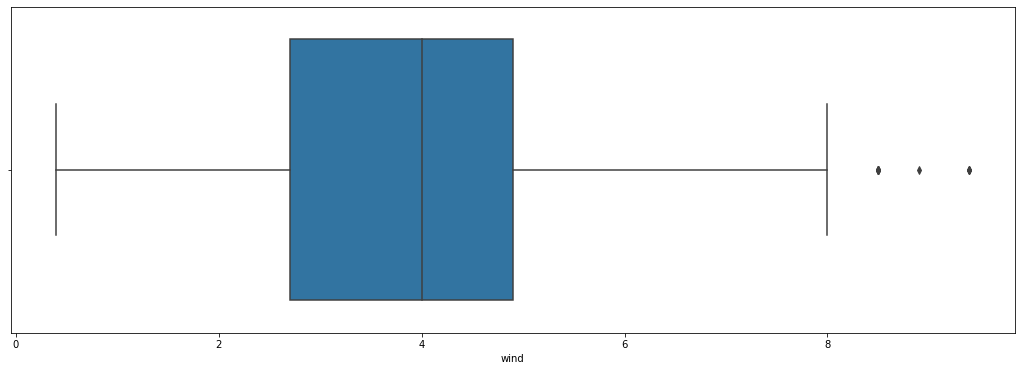

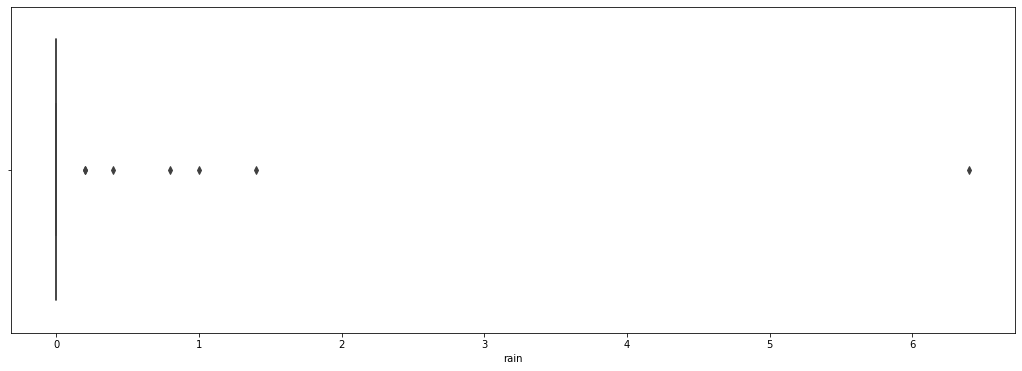

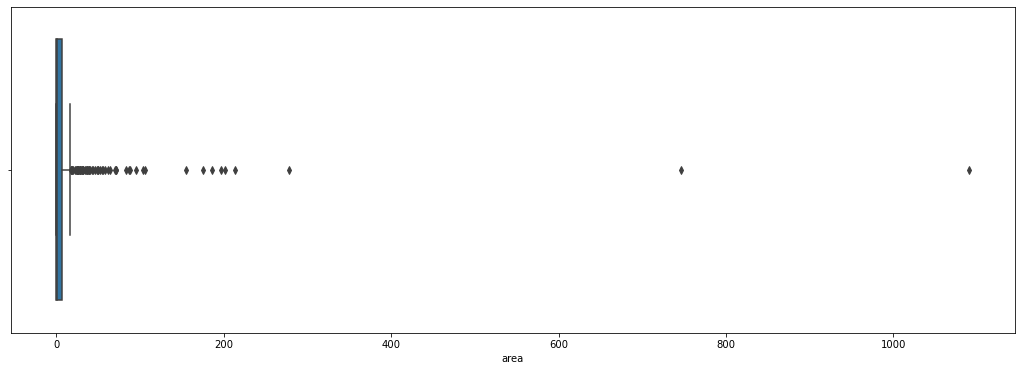

In [300]:
for feature in ff_data_cont.columns:
    plt.figure(figsize=(18,6))
    sb.boxplot(ff_data_cont[feature])

<AxesSubplot:>

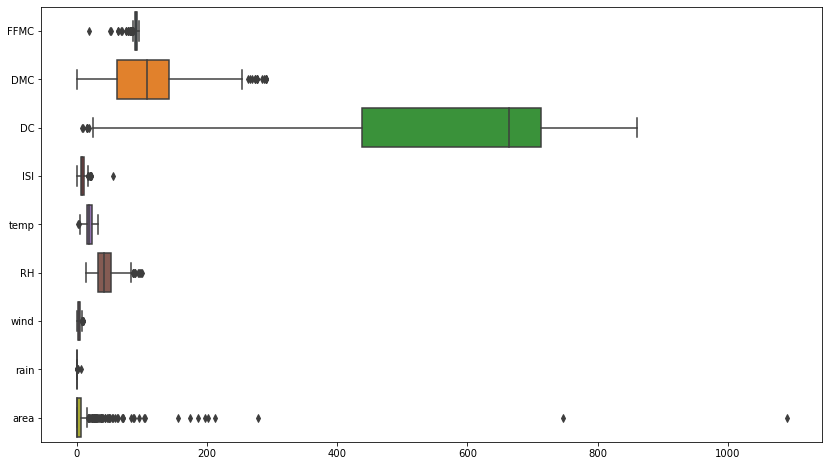

In [301]:
plt.figure(figsize=(14,8))
sb.boxplot(data=ff_data_cont, orient='h')

#### Multivariate Analysis

#### Correlation and Heat map

In [302]:
# Checking for Correlation between variables
ff_data.corr()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
FFMC,1.000000,0.382925,0.331956,0.531926,0.431744,-0.306262,-0.030409,0.052280,0.040998
DMC,0.382925,1.000000,0.681446,0.309459,0.470875,0.062772,-0.104563,0.071017,0.076932
DC,0.331956,0.681446,1.000000,0.229757,0.496608,-0.047971,-0.202856,0.033772,0.051542
ISI,0.531926,0.309459,0.229757,1.000000,0.395858,-0.135955,0.104834,0.062132,0.008429
temp,0.431744,0.470875,0.496608,0.395858,1.000000,-0.532503,-0.227754,0.067911,0.099173
RH,-0.306262,0.062772,-0.047971,-0.135955,-0.532503,1.000000,0.070721,0.094343,-0.074554
wind,-0.030409,-0.104563,-0.202856,0.104834,-0.227754,0.070721,1.000000,0.059332,0.012623
rain,0.052280,0.071017,0.033772,0.062132,0.067911,0.094343,0.059332,1.000000,-0.006511
area,0.040998,0.076932,0.051542,0.008429,0.099173,-0.074554,0.012623,-0.006511,1.000000


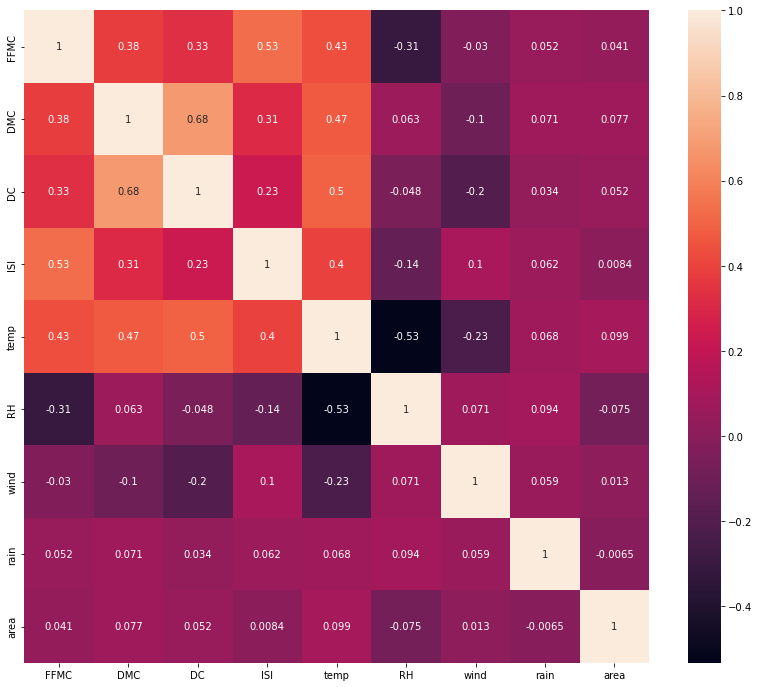

In [303]:
plt.figure(figsize=(14,12))
sb.heatmap(ff_data_num.corr(),annot=True)
plt.show()

#### Observation
+ We can see that 'DMC' and 'DC'are strongly correlated.

<Figure size 576x576 with 0 Axes>

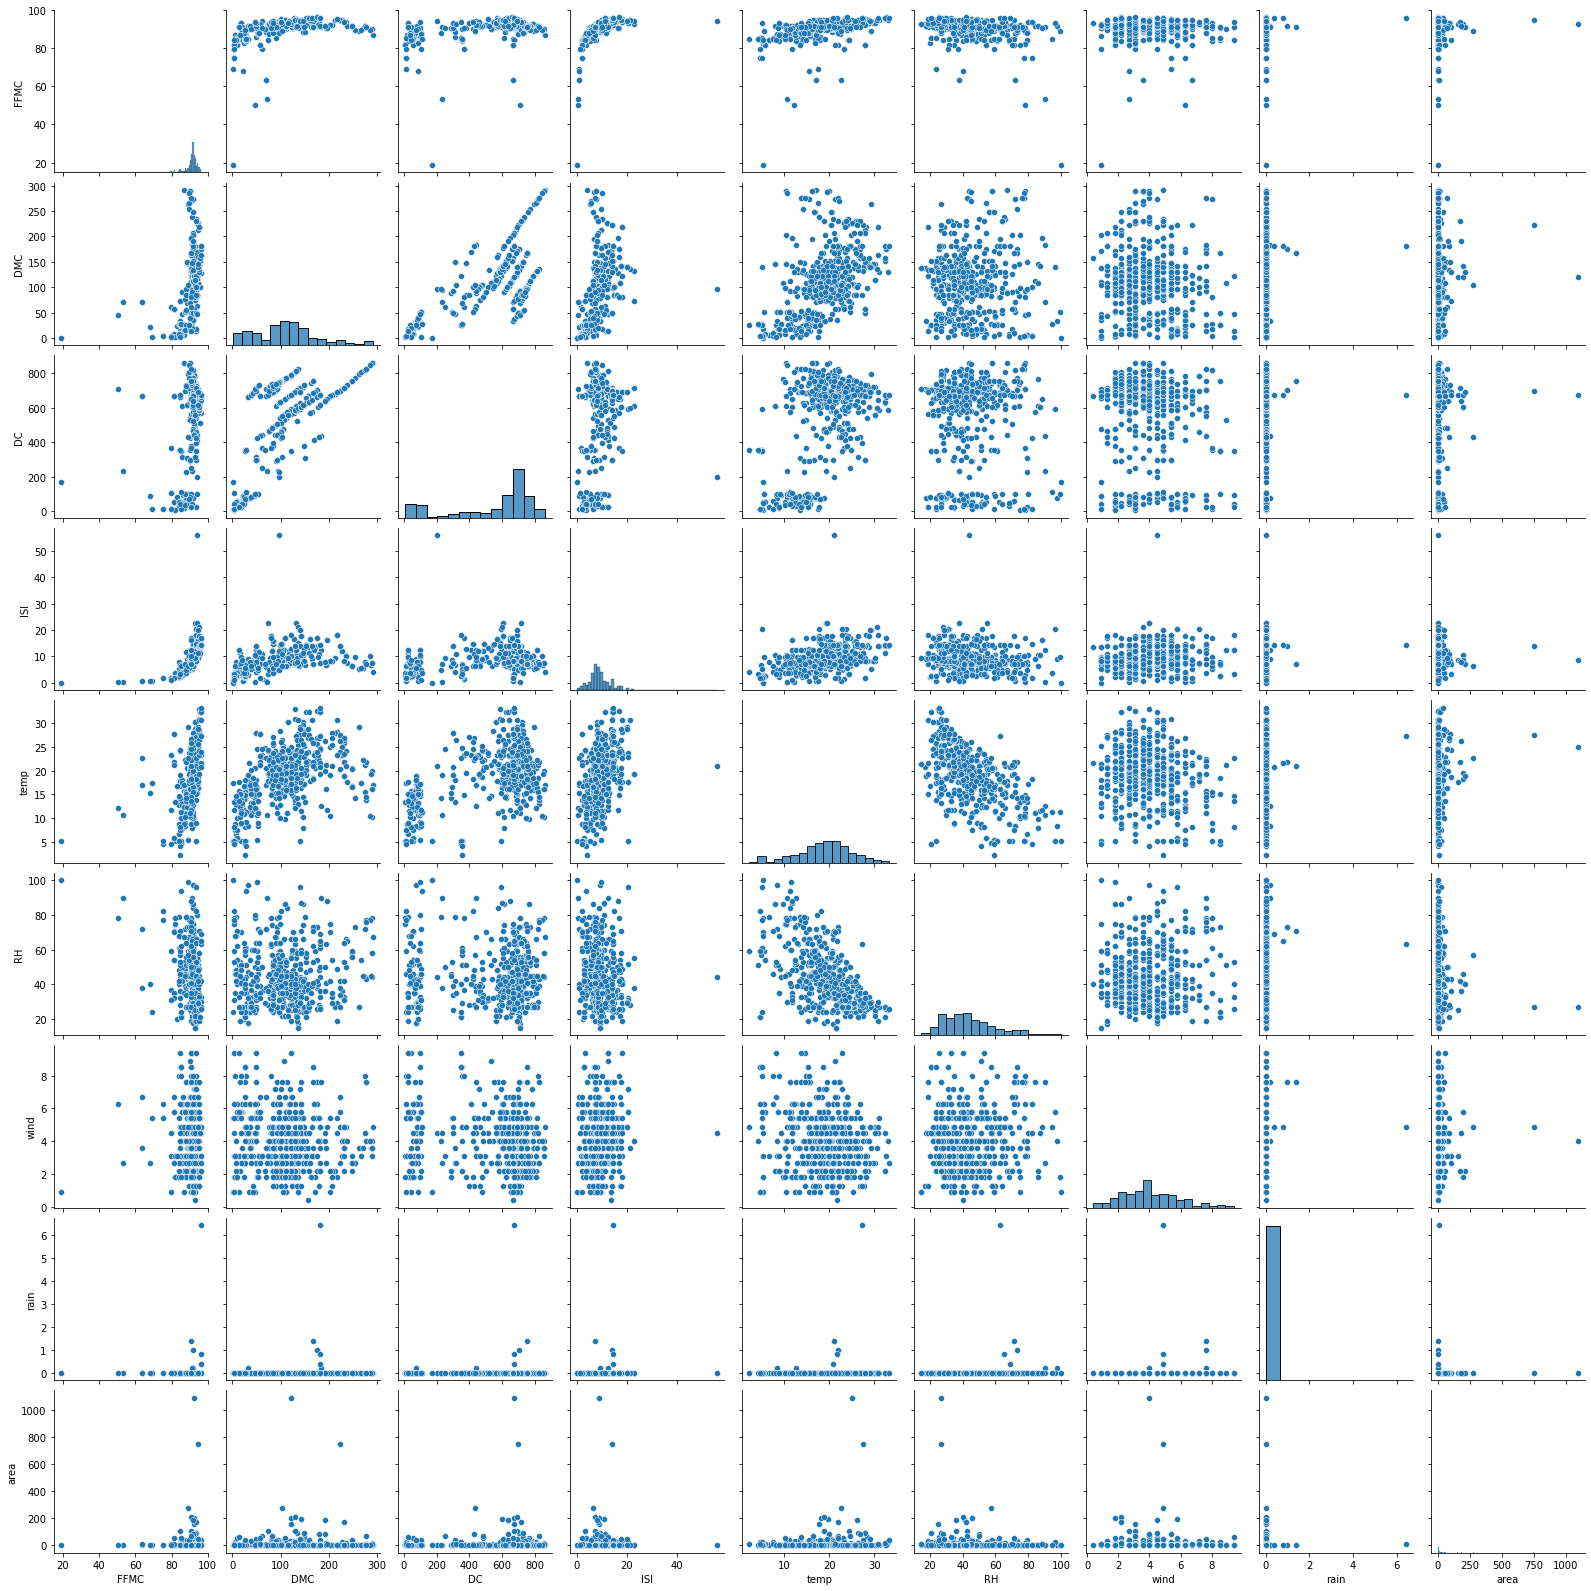

In [304]:
plt.figure(figsize=(8,8))
sb.pairplot(ff_data_num, palette='coolwarm')
plt.show()

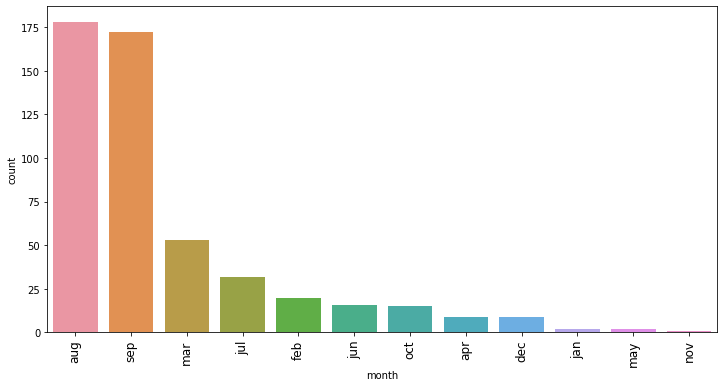

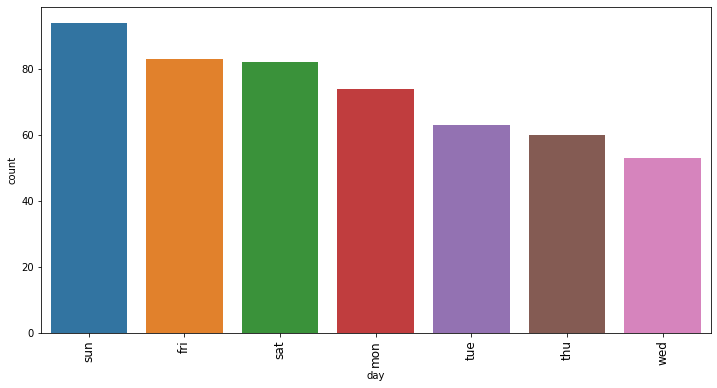

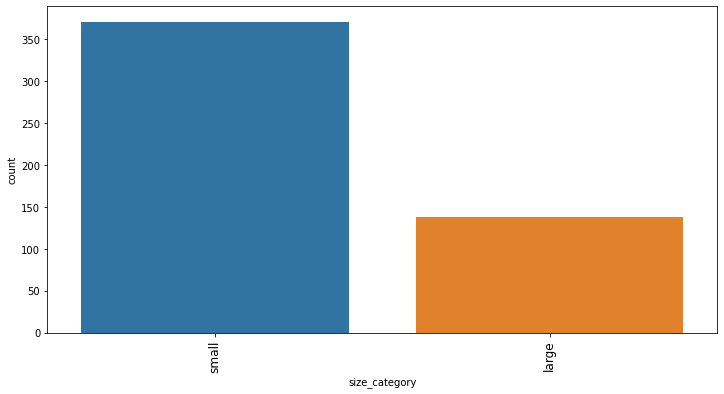

In [305]:
for i in ff_data_cat.columns:
    plt.figure(figsize=(12,6))
    sb.countplot(x=i, data=ff_data_cat, 
              order=ff_data_cat[i].value_counts().index)
    plt.xticks(rotation = 90,fontsize = 12)
plt.show()

In [306]:
ff_data_std = ff_data.copy()

In [307]:
le = LabelEncoder()
for col in ff_data_cat.columns:
        le.fit(ff_data_mdf[col])
        ff_data_mdf[col] = le.transform(ff_data_mdf[col])
ff_data_mdf

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category
0,7,0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,1
1,10,5,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,1
2,10,2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,1
3,7,0,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,1
4,7,3,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...
504,1,3,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,0
505,1,3,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,0
506,1,3,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,0
507,1,2,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,1


### Step-3 : Feature Selection

### Step-3.1 : Split the data into training and testing data

In [308]:
x = ff_data_mdf.drop('size_category', 1)
y = ff_data_mdf['size_category']

### Step-3.2 : Feature Extraction

In [309]:
# feature extraction
test = SelectKBest(score_func=mutual_info_regression, k='all')
fit = test.fit(x, y)

In [310]:
# summarize scores
scores = fit.scores_

features = fit.transform(x)

In [311]:
score_df = pd.DataFrame(list(zip(scores, x.columns)),
               columns =['Score', 'Feature'])
score_df.sort_values(by="Score", ascending=False, inplace=True)
score_df

,Score,Feature
10,0.604720,area
8,0.071740,wind
6,0.037268,temp
3,0.032361,DMC
5,0.024767,ISI
2,0.022641,FFMC
4,0.016139,DC
0,0.000000,month
1,0.000000,day
7,0.000000,RH


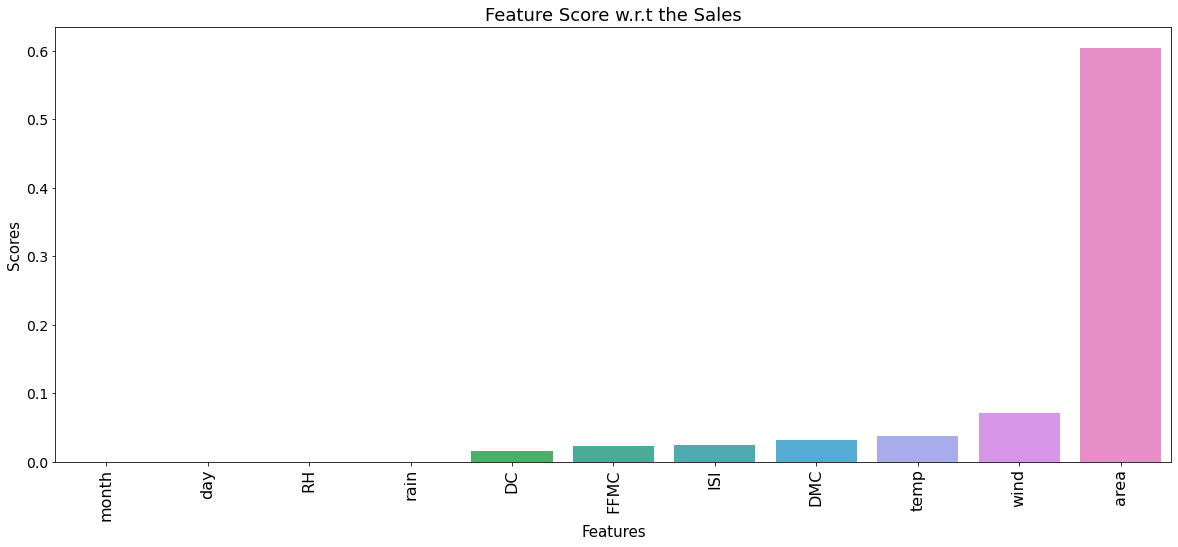

In [312]:
plt.figure(figsize=(20,8))
# make barplot and sort bars
sb.barplot(x='Feature',
            y="Score", 
            data=score_df, 
            order=score_df.sort_values('Score').Feature)
# set labels
plt.xlabel("Features", size=15)
plt.ylabel("Scores", size=15)
plt.yticks(rotation = 0, fontsize = 14)
plt.xticks(rotation = 90, fontsize = 16)
plt.title("Feature Score w.r.t the Sales", size=18)
plt.show()

In [313]:
model_data = ff_data_mdf[['area', 'FFMC','DMC', 'temp', 'RH', 'ISI', 'DC','month',"size_category"]]
model_data.head()

,area,FFMC,DMC,temp,RH,ISI,DC,month,size_category
0,0.0,86.2,26.2,8.2,51,5.1,94.3,7,1
1,0.0,90.6,35.4,18.0,33,6.7,669.1,10,1
2,0.0,90.6,43.7,14.6,33,6.7,686.9,10,1
3,0.0,91.7,33.3,8.3,97,9.0,77.5,7,1
4,0.0,89.3,51.3,11.4,99,9.6,102.2,7,1


### Step-4 : Data Pre-Processing

### Step-4.1 : Standardizing the values

In [314]:
model_data_std = model_data.drop('size_category',axis=1)
features = model_data_std.columns

In [315]:
standard_scaler = StandardScaler()
model_data_std[features] = standard_scaler.fit_transform(model_data_std.values)
model_data_std.head()

,area,FFMC,DMC,temp,RH,ISI,DC,month
0,-0.202791,-0.796040,-1.318386,-1.827729,0.412656,-0.856568,-1.828931,0.271858
1,-0.202791,-0.003257,-1.174053,-0.148307,-0.688321,-0.507267,0.489257,0.958019
2,-0.202791,-0.003257,-1.043839,-0.730964,-0.688321,-0.507267,0.561045,0.958019
3,-0.202791,0.194939,-1.206998,-1.810592,3.226265,-0.005147,-1.896686,0.271858
4,-0.202791,-0.237488,-0.924607,-1.279346,3.348596,0.125841,-1.797070,0.271858


In [316]:
model_data_std['size_category']=model_data.size_category
model_data_std

,area,FFMC,DMC,temp,RH,ISI,DC,month,size_category
0,-0.202791,-0.796040,-1.318386,-1.827729,0.412656,-0.856568,-1.828931,0.271858,1
1,-0.202791,-0.003257,-1.174053,-0.148307,-0.688321,-0.507267,0.489257,0.958019,1
2,-0.202791,-0.003257,-1.043839,-0.730964,-0.688321,-0.507267,0.561045,0.958019,1
3,-0.202791,0.194939,-1.206998,-1.810592,3.226265,-0.005147,-1.896686,0.271858,1
4,-0.202791,-0.237488,-0.924607,-1.279346,3.348596,0.125841,-1.797070,0.271858,1
...,...,...,...,...,...,...,...,...,...
504,-0.102277,-1.624859,-0.839890,1.531115,-0.749487,-1.555170,0.475141,-1.100464,0
505,0.644559,-1.624859,-0.839890,0.520034,1.635965,-1.555170,0.475141,-1.100464,0
506,-0.028608,-1.624859,-0.839890,0.400076,1.574799,-1.555170,0.475141,-1.100464,0
507,-0.202791,0.681420,0.561083,1.154102,-0.137832,0.496973,0.269860,-1.100464,1


### Step-4.2 : Split the data into training and testing data

In [317]:
x = model_data_std.drop('size_category', 1)
y = model_data_std['size_category']

In [318]:
# Splitting data into test data and train data

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=3)

### Step-5 : Hyperparameter Tuning

### Step-5.1 : Optimal Learning rate ,Number of Layers and Neurons

In [319]:
def build_model(hp):
    model =Sequential()
    for i in range(hp.Int('num_layers', 2, 20)):
        model.add(layers.Dense(units=hp.Int('units_' + str(i),
                                            min_value=32,
                                            max_value=100,
                                            step=32),
                               activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))
    model.compile(
        optimizer=keras.optimizers.Adam(
            hp.Choice('learning_rate', [1e-2, 1e-3, 1e-4])),
        loss='binary_crossentropy',
        metrics=['accuracy'])
    return model

In [320]:
tuner = RandomSearch(build_model,objective='val_accuracy',max_trials=5,  executions_per_trial=3,directory='project',project_name='Forest Fire')

INFO:tensorflow:Reloading Oracle from existing project project\Forest Fire\oracle.json
INFO:tensorflow:Reloading Tuner from project\Forest Fire\tuner0.json


In [321]:
tuner.search_space_summary()

Search space summary
Default search space size: 21
num_layers (Int)
{'default': None, 'conditions': [], 'min_value': 2, 'max_value': 20, 'step': 1, 'sampling': None}
units_0 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 100, 'step': 32, 'sampling': None}
units_1 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 100, 'step': 32, 'sampling': None}
learning_rate (Choice)
{'default': 0.01, 'conditions': [], 'values': [0.01, 0.001, 0.0001], 'ordered': True}
units_2 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 100, 'step': 32, 'sampling': None}
units_3 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 100, 'step': 32, 'sampling': None}
units_4 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 100, 'step': 32, 'sampling': None}
units_5 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 100, 'step': 32, 'sampling': None}
units_6 (Int)
{'default': None, 'co

In [322]:
tuner.search(x_train, y_train,epochs=100,validation_data=(x_test, y_test))

INFO:tensorflow:Oracle triggered exit


In [323]:
tuner.results_summary()

Results summary
Results in project\Forest Fire
Showing 10 best trials
Trial summary
Hyperparameters:
num_layers: 17
units_0: 96
units_1: 64
learning_rate: 0.001
units_2: 64
units_3: 32
units_4: 64
units_5: 64
units_6: 64
units_7: 96
units_8: 96
units_9: 96
units_10: 64
units_11: 96
units_12: 64
units_13: 64
units_14: 32
units_15: 96
units_16: 32
Score: 0.9237472812334696
Trial summary
Hyperparameters:
num_layers: 19
units_0: 32
units_1: 96
learning_rate: 0.01
units_2: 64
units_3: 64
units_4: 64
units_5: 96
units_6: 32
units_7: 32
units_8: 96
units_9: 64
units_10: 96
units_11: 96
units_12: 64
units_13: 64
units_14: 32
units_15: 32
units_16: 64
units_17: 32
units_18: 32
Score: 0.8910675446192423
Trial summary
Hyperparameters:
num_layers: 15
units_0: 96
units_1: 64
learning_rate: 0.0001
units_2: 32
units_3: 32
units_4: 32
units_5: 32
units_6: 32
units_7: 32
units_8: 32
units_9: 32
units_10: 32
units_11: 32
units_12: 32
units_13: 32
units_14: 32
Score: 0.8736383517583212
Trial summary
Hype

### Step-5.2 : Optimal Batch_size, Number of Epochs

In [324]:
def create_model():
    model1 = Sequential()
    model1.add(Dense(64,input_dim=8,activation='relu'))
    model1.add(Dense(64,activation='relu'))
    model1.add(Dense(32,activation="relu"))
    model1.add(Dense(units=1,activation="sigmoid"))
    
    adam=Adam(learning_rate=0.01)
    model1.compile(loss='binary_crossentropy',optimizer = adam,metrics=["accuracy"])
    return model1

In [325]:
model1 =KerasRegressor(build_fn=create_model,verbose=0)
batch_size=[10,20,40,50]
epochs=[10,50,100,200]
param_grid=dict(batch_size=batch_size,epochs=epochs)
grid = GridSearchCV(estimator=model1,param_grid=param_grid,cv=KFold(),verbose=10)

In [326]:
grid_result = grid.fit(x_test,y_test)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV 1/5; 1/16] START batch_size=10, epochs=10...................................
[CV 1/5; 1/16] END ...batch_size=10, epochs=10;, score=-0.244 total time=   3.9s
[CV 2/5; 1/16] START batch_size=10, epochs=10...................................
[CV 2/5; 1/16] END ...batch_size=10, epochs=10;, score=-0.817 total time=   3.6s
[CV 3/5; 1/16] START batch_size=10, epochs=10...................................
[CV 3/5; 1/16] END ...batch_size=10, epochs=10;, score=-0.296 total time=   4.3s
[CV 4/5; 1/16] START batch_size=10, epochs=10...................................
[CV 4/5; 1/16] END ...batch_size=10, epochs=10;, score=-0.303 total time=   4.5s
[CV 5/5; 1/16] START batch_size=10, epochs=10...................................
[CV 5/5; 1/16] END ...batch_size=10, epochs=10;, score=-0.172 total time=   3.5s
[CV 1/5; 2/16] START batch_size=10, epochs=50...................................
[CV 1/5; 2/16] END ...batch_size=10, epochs=50;,

[CV 1/5; 11/16] END .batch_size=40, epochs=100;, score=-0.001 total time=   4.7s
[CV 2/5; 11/16] START batch_size=40, epochs=100.................................
[CV 2/5; 11/16] END .batch_size=40, epochs=100;, score=-1.479 total time=   6.0s
[CV 3/5; 11/16] START batch_size=40, epochs=100.................................
[CV 3/5; 11/16] END .batch_size=40, epochs=100;, score=-0.786 total time=   5.5s
[CV 4/5; 11/16] START batch_size=40, epochs=100.................................
[CV 4/5; 11/16] END .batch_size=40, epochs=100;, score=-0.430 total time=   4.7s
[CV 5/5; 11/16] START batch_size=40, epochs=100.................................
[CV 5/5; 11/16] END .batch_size=40, epochs=100;, score=-0.951 total time=   5.9s
[CV 1/5; 12/16] START batch_size=40, epochs=200.................................
[CV 1/5; 12/16] END .batch_size=40, epochs=200;, score=-0.081 total time=   7.7s
[CV 2/5; 12/16] START batch_size=40, epochs=200.................................
[CV 2/5; 12/16] END .batch_s

In [327]:
print('Best {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_["mean_test_score"]
stds = grid_result.cv_results_["std_test_score"]
params = grid_result.cv_results_["params"]
for mean,stdev,param in zip(means,stds,params):
    print("{},{} with {}".format(mean,stdev,param))

Best -0.366225403547287, using {'batch_size': 10, 'epochs': 10}
-0.366225403547287,0.22999747321607059 with {'batch_size': 10, 'epochs': 10}
-0.4766271963715553,0.39952805534183794 with {'batch_size': 10, 'epochs': 50}
-0.7543532114388654,0.5509632527402271 with {'batch_size': 10, 'epochs': 100}
-0.7695274651050568,0.498328826750766 with {'batch_size': 10, 'epochs': 200}
-0.4532112777233124,0.20263682711376024 with {'batch_size': 20, 'epochs': 10}
-0.49998569320887326,0.4949849657296188 with {'batch_size': 20, 'epochs': 50}
-0.6162366695367382,0.4235885735881401 with {'batch_size': 20, 'epochs': 100}
-1.1030437100678683,0.8903083733301453 with {'batch_size': 20, 'epochs': 200}
-0.513273298740387,0.1142923738394285 with {'batch_size': 40, 'epochs': 10}
-0.7023949742317199,0.44622441724654166 with {'batch_size': 40, 'epochs': 50}
-0.7296439273515716,0.4966599064352158 with {'batch_size': 40, 'epochs': 100}
-0.9352332890033722,0.6708601572654049 with {'batch_size': 40, 'epochs': 200}
-0.5

### Step-5.3 : Hyperparameter Tuning : Optimal Droupout rate

In [328]:
def create_model(dropout_rate):
    model2 = Sequential()
    model2.add(Dense(64,input_dim=8,activation='relu'))
    model2.add(Dense(64,activation='relu'))
    model2.add(Dense(32,activation="relu"))
    model2.add(Dense(units=1,activation="sigmoid"))
    
    adam=Adam(lr=0.01)
    model2.compile(loss='binary_crossentropy',optimizer = adam,metrics=["accuracy"])
    return model2

In [329]:
model2=KerasRegressor(build_fn=create_model,batch_size=40,epochs=200,verbose=0)
dropout_rate=[0.0,0.1,0.2,0.3,0.4,0.5]
param_grid=dict(dropout_rate=dropout_rate)
grid2 = GridSearchCV(estimator=model2,param_grid=param_grid,cv=KFold(),verbose=10)

In [330]:
grid_result2 = grid2.fit(x_test,y_test)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV 1/5; 1/6] START dropout_rate=0.0............................................
[CV 1/5; 1/6] END ............dropout_rate=0.0;, score=-0.188 total time=   8.5s
[CV 2/5; 1/6] START dropout_rate=0.0............................................
[CV 2/5; 1/6] END ............dropout_rate=0.0;, score=-1.339 total time=  10.1s
[CV 3/5; 1/6] START dropout_rate=0.0............................................
[CV 3/5; 1/6] END ............dropout_rate=0.0;, score=-0.842 total time=   8.1s
[CV 4/5; 1/6] START dropout_rate=0.0............................................
[CV 4/5; 1/6] END ............dropout_rate=0.0;, score=-0.738 total time=   9.6s
[CV 5/5; 1/6] START dropout_rate=0.0............................................
[CV 5/5; 1/6] END ............dropout_rate=0.0;, score=-1.833 total time=   7.6s
[CV 1/5; 2/6] START dropout_rate=0.1............................................
[CV 1/5; 2/6] END ............dropout_rate=0.1;, 

In [331]:
print('Best {}, using {}'.format(grid_result2.best_score_,grid_result2.best_params_))
means = grid_result2.cv_results_["mean_test_score"]
stds = grid_result2.cv_results_["std_test_score"]
params = grid_result2.cv_results_["params"]
for mean,stdev,param in zip(means,stds,params):
    print("{},{} with {}".format(mean,stdev,param))

Best -0.8764840483665466, using {'dropout_rate': 0.1}
-0.9878086090087891,0.5586465893482716 with {'dropout_rate': 0.0}
-0.8764840483665466,0.5993889523086078 with {'dropout_rate': 0.1}
-0.9766857981681824,0.5749103903545948 with {'dropout_rate': 0.2}
-1.0375164091587066,0.39711327399552426 with {'dropout_rate': 0.3}
-0.9973769500851631,0.5621245363863204 with {'dropout_rate': 0.4}
-0.9724264711141586,0.571765031584391 with {'dropout_rate': 0.5}


### Step-5.4 : Optimal Activation Function and Kernel Initializer

In [332]:
def create_model(activation_function,init):
    model3 = Sequential()
    model3.add(Dense(64,input_dim=8,activation='relu'))
    model3.add(Dropout(0.0))
    model3.add(Dense(64,activation='relu'))
    model3.add(Dropout(0.0))
    model3.add(Dense(32,activation="relu"))
    model3.add(Dropout(0.0))
    model3.add(Dense(units=1,activation="sigmoid"))
    
    adam=Adam(lr=0.01)
    model3.compile(loss='binary_crossentropy',optimizer = adam,metrics=["accuracy"])
    return model3

In [333]:
model3=KerasRegressor(build_fn=create_model,batch_size=40,epochs=200,verbose=0)
activation_function=['softmax','tanh','relu']
init=['normal','uniform','zero']
param_grid=dict(activation_function=activation_function,init=init)
grid3 = GridSearchCV(estimator=model3,param_grid=param_grid,cv=KFold(),verbose=10)

In [334]:
grid_result3 = grid3.fit(x_test,y_test)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5; 1/9] START activation_function=softmax, init=normal....................
[CV 1/5; 1/9] END activation_function=softmax, init=normal;, score=-0.117 total time=   8.2s
[CV 2/5; 1/9] START activation_function=softmax, init=normal....................
[CV 2/5; 1/9] END activation_function=softmax, init=normal;, score=-1.546 total time=   7.5s
[CV 3/5; 1/9] START activation_function=softmax, init=normal....................
[CV 3/5; 1/9] END activation_function=softmax, init=normal;, score=-0.473 total time=   8.1s
[CV 4/5; 1/9] START activation_function=softmax, init=normal....................
[CV 4/5; 1/9] END activation_function=softmax, init=normal;, score=-1.133 total time=   8.5s
[CV 5/5; 1/9] START activation_function=softmax, init=normal....................
[CV 5/5; 1/9] END activation_function=softmax, init=normal;, score=-0.999 total time=   8.2s
[CV 1/5; 2/9] START activation_function=softmax, init=uniform.........

In [335]:
print('Best {}, using {}'.format(grid_result3.best_score_,grid_result3.best_params_))
means = grid_result3.cv_results_["mean_test_score"]
stds = grid_result3.cv_results_["std_test_score"]
params = grid_result3.cv_results_["params"]
for mean,stdev,param in zip(means,stds,params):
    print("{},{} with {}".format(mean,stdev,param))

Best -0.6843995486851782, using {'activation_function': 'tanh', 'init': 'uniform'}
-0.8535375341773033,0.5033127962933862 with {'activation_function': 'softmax', 'init': 'normal'}
-0.976781296543777,0.7535813461869787 with {'activation_function': 'softmax', 'init': 'uniform'}
-0.802961149555631,0.5134760046084684 with {'activation_function': 'softmax', 'init': 'zero'}
-0.9048031538724899,0.49462935663397356 with {'activation_function': 'tanh', 'init': 'normal'}
-0.6843995486851782,0.42581655860255857 with {'activation_function': 'tanh', 'init': 'uniform'}
-0.9457407057285309,0.4577936609843391 with {'activation_function': 'tanh', 'init': 'zero'}
-0.7163103623577627,0.49733117125648524 with {'activation_function': 'relu', 'init': 'normal'}
-0.7649664481636137,0.6286241907296816 with {'activation_function': 'relu', 'init': 'uniform'}
-0.7434888422489166,0.5691878430905676 with {'activation_function': 'relu', 'init': 'zero'}


### Step-6 : Model Building Neural Networks

In [336]:
def toFindBestParams(x_train, y_train, x_test, y_test):
    #print(y_test.shape)
    #sys.exit()
    
    #defining list of hyperparameters
    batch_size_list = [5 , 10 , 15 , 20]
    epoch_list      = [5 , 10 , 50 , 100]
           
    # initializing the trials
    for batch_trial in batch_size_list:
        for epochs_trial in epoch_list:
            
            # create ANN model
            model = Sequential()
            # Defining the first layer of the model
            model.add(Dense(units=50, input_dim=x_train.shape[1], kernel_initializer='normal', activation='tanh'))
            
            # Defining the Second layer of the model
            model.add(Dense(units=6, kernel_initializer='normal', activation='tanh'))
 
            # The output neuron is a single fully connected node 
            # Since we will be predicting a single number
            model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))
 
            # Compiling the model
            model.compile(loss='binary_crossentropy', optimizer='adam',  metrics=['accuracy'])
 
            # Fitting the ANN to the Training set
            model_trained = model.fit(x_train, y_train ,batch_size = batch_trial, epochs = epochs_trial, verbose=0)
               
             # Fetching the accuracy of the training
            Accuracy_train = model_trained.history['accuracy'][-1]   
            
            # printing the results of the current iteration
            print('batch_size:', batch_trial,'-', 'epochs:',epochs_trial, 'Accuracy:',Accuracy_train)

# Calling the function
toFindBestParams(x_train, y_train, x_test, y_test)

batch_size: 5 - epochs: 5 Accuracy: 0.8483145833015442
batch_size: 5 - epochs: 10 Accuracy: 0.9297752976417542
batch_size: 5 - epochs: 50 Accuracy: 0.9803370833396912
batch_size: 5 - epochs: 100 Accuracy: 0.9943820238113403
batch_size: 10 - epochs: 5 Accuracy: 0.7893258333206177
batch_size: 10 - epochs: 10 Accuracy: 0.8792135119438171
batch_size: 10 - epochs: 50 Accuracy: 0.9915730357170105
batch_size: 10 - epochs: 100 Accuracy: 0.9971910119056702
batch_size: 15 - epochs: 5 Accuracy: 0.7696629166603088
batch_size: 15 - epochs: 10 Accuracy: 0.8398876190185547
batch_size: 15 - epochs: 50 Accuracy: 0.9943820238113403
batch_size: 15 - epochs: 100 Accuracy: 0.9943820238113403
batch_size: 20 - epochs: 5 Accuracy: 0.7696629166603088
batch_size: 20 - epochs: 10 Accuracy: 0.8117977380752563
batch_size: 20 - epochs: 50 Accuracy: 0.9915730357170105
batch_size: 20 - epochs: 100 Accuracy: 0.9943820238113403


#### Training Model - using best params

In [337]:
 # create ANN model
model = Sequential()
# Defining the first layer of the model
model.add(Dense(units=50, input_dim=x_train.shape[1], kernel_initializer='normal', activation='tanh'))
model.add(Dropout(0.1))        
# Defining the Second layer of the model
model.add(Dense(units=6, kernel_initializer='normal', activation='tanh'))
 model.add(Dropout(0.1))  
# The output neuron is a single fully connected node 
# Since we will be predicting a single number
model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))

model.compile(optimizer='Adam',loss='binary_crossentropy', metrics=['accuracy'])

# Training the model with best parameters
history = model.fit(x_train, y_train, validation_split=0.33, batch_size = 10, epochs = 100)

Epoch 1/100
24/24 [==============================] - 4s 45ms/step - loss: 0.6887 - accuracy: 0.7227 - val_loss: 0.6801 - val_accuracy: 0.7966
Epoch 2/100
24/24 [==============================] - 0s 16ms/step - loss: 0.6755 - accuracy: 0.7521 - val_loss: 0.6610 - val_accuracy: 0.7966
Epoch 3/100
24/24 [==============================] - 0s 16ms/step - loss: 0.6496 - accuracy: 0.7563 - val_loss: 0.6249 - val_accuracy: 0.7966
Epoch 4/100
24/24 [==============================] - 0s 17ms/step - loss: 0.6061 - accuracy: 0.7605 - val_loss: 0.5705 - val_accuracy: 0.7966
Epoch 5/100
24/24 [==============================] - 0s 11ms/step - loss: 0.5556 - accuracy: 0.7605 - val_loss: 0.5190 - val_accuracy: 0.7966
Epoch 6/100
24/24 [==============================] - 0s 9ms/step - loss: 0.5185 - accuracy: 0.7647 - val_loss: 0.4852 - val_accuracy: 0.7966
Epoch 7/100
24/24 [==============================] - 0s 15ms/step - loss: 0.4901 - accuracy: 0.7857 - val_loss: 0.4627 - val_accuracy: 0.8220
Epoch 8

### Step-6.1 : Model Evaluation Train and Test Error

In [338]:
# evaluate the model
scores = model.evaluate(x, y)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

16/16 [==============================] - 0s 4ms/step - loss: 0.0628 - accuracy: 0.9804
accuracy: 98.04%


In [339]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

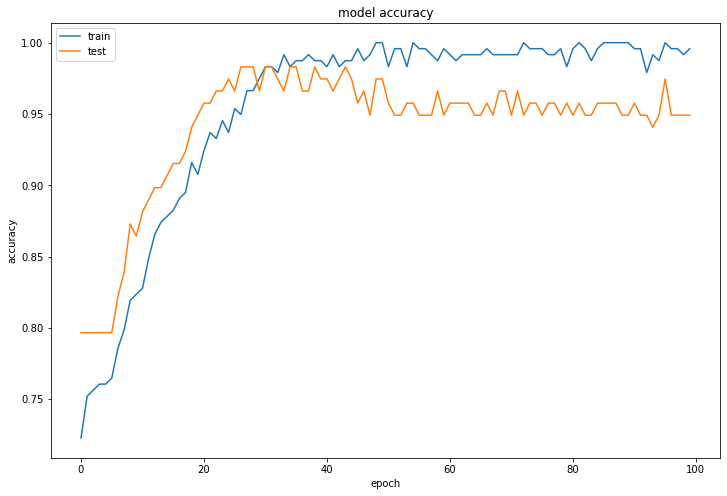

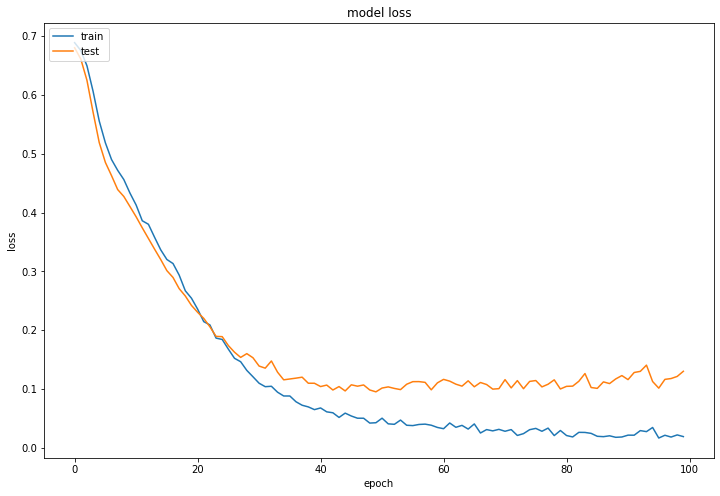

In [340]:
# summarize history for accuracy
plt.figure(figsize=(12,8))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.figure(figsize=(12,8))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()